In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Rename the first column to 'Years_Experience'

In [14]:
df.rename(columns={'YearsExperience':'Years_Experience'},inplace=True)
df.head()

,Years_Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [15]:
# x,y values
X = df["Years_Experience"].to_numpy().reshape(-1,1)
y = df["Salary"].to_numpy().reshape(-1,1)
# X = df.loc[:,"Years_Experience"].to_numpy().reshape(-1,1)
# y = df.loc[:,"Salary"].to_numpy().reshape(-1,1)

### Years Experience vs. Salary

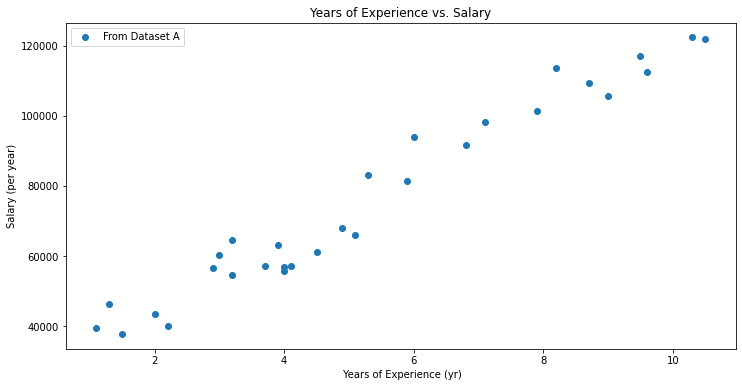

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(X, y, label='From Dataset A')
plt.xlabel(" Years of Experience (yr)")
plt.ylabel("Salary (per year)")
plt.legend(loc='upper left')
plt.title("Years of Experience vs. Salary")
plt.show()

## 把資料標準化

In [17]:
scaler = StandardScaler()
# std_df = scaler.fit_transform(df)
sc_x = scaler.fit_transform(X)
sc_y = scaler.fit_transform(y)


### Plotting Standardized Years_Experience(X) vs. Salary(y)

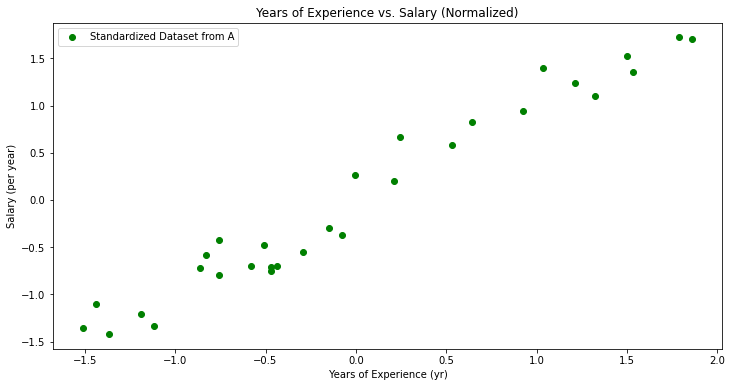

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(sc_x,sc_y, color='green', label='Standardized Dataset from A')
plt.xlabel(" Years of Experience (yr)")
plt.ylabel("Salary (per year)")
plt.legend(loc='upper left')
plt.title("Years of Experience vs. Salary (Normalized)")
plt.show()

### Test & Train split visualization

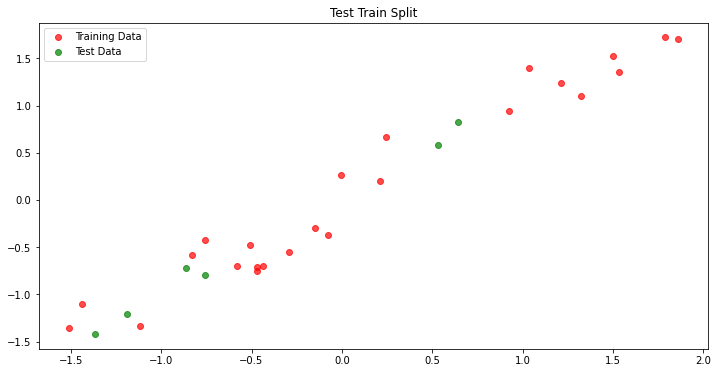

In [19]:
train_x, test_x, train_y, test_y  = train_test_split(sc_x, sc_y, test_size=0.2, random_state=10)

plt.figure(figsize=(12,6))
plt.scatter(train_x,train_y, label='Training Data', color='red', alpha=0.7)
plt.scatter(test_x,test_y, label='Test Data', color='green', alpha=0.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

## Linear Regression:

In [20]:
regression = LinearRegression()
regression.fit(train_x,train_y)
y_p = regression.predict(test_x) #y value predicted using our LR model with test_x

## At this point we have finished training our model:

In [21]:
# Let's look at the weight and bias of our model
coeff = regression.coef_
intercept = regression.intercept_

print(f'Our Linear Regression function is:\ny = {coeff} * x + {intercept}')

Our Linear Regression function is:
y = [[0.96860416]] * x + [-0.00733746]


In [22]:
def lr(yr, coeff, intercept):
    '''This is our linear regression function'''
    return coeff*yr + intercept

## We can see our model vs. test data:

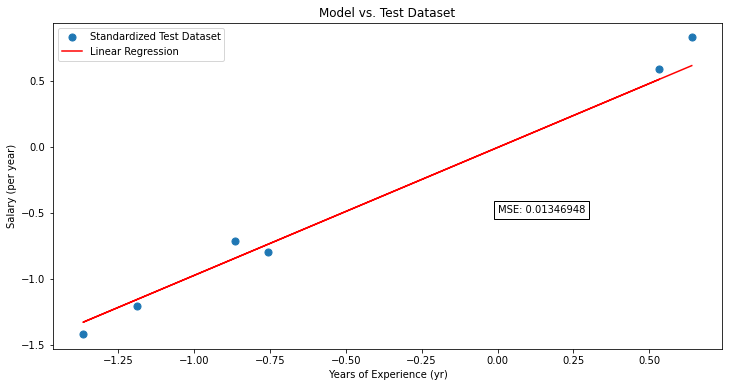

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(test_x, test_y, s = 50, label='Standardized Test Dataset')
plt.plot(test_x,y_p, color = 'red', label='Linear Regression')

plt.legend()
plt.xlabel(" Years of Experience (yr)")
plt.ylabel("Salary (per year)")
plt.title("Model vs. Test Dataset")
plt.text(0,-0.5,f'MSE: {mean_squared_error(test_y, y_p):.8f}',bbox=dict(facecolor='white',edgecolor='black'))

plt.show()

## Inverse Transform to original values:

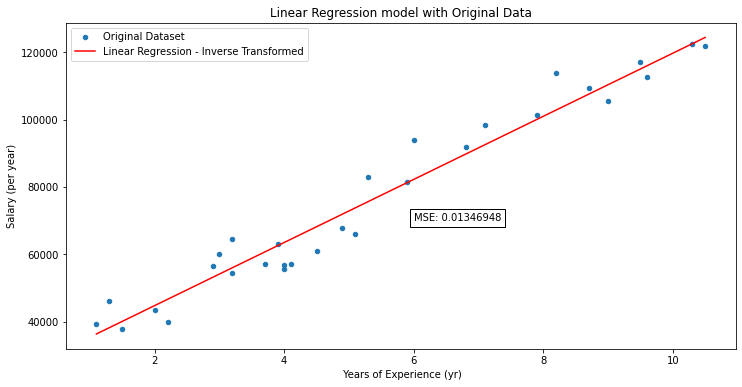

In [24]:
# predict Y_pred based on sc_x
Y_pred = regression.predict(sc_x)

# Inverse transform scaled 'Y_pred' to true y values
Y_inv_pred = scaler.inverse_transform(Y_pred) 

plt.figure(figsize=(12,6))
plt.scatter(X, y, s = 20, label='Original Dataset')
plt.plot(X,Y_inv_pred, color = 'red', label='Linear Regression - Inverse Transformed')

plt.legend()
plt.xlabel(" Years of Experience (yr)")
plt.ylabel("Salary (per year)")
plt.title("Linear Regression model with Original Data")
plt.text(6,70000,f'MSE: {mean_squared_error(test_y, y_p):.8f}',bbox=dict(facecolor='white',edgecolor='black'))

plt.show()